## Loading the csv file and making some changes and verifications

In [71]:
import pandas as pd

In [72]:
# load the dataset mushroom, where the objective is predict whether a mushroom is poisonous or not ("class" column)
dataset = pd.read_csv('./dataset/mushroom_cleaned.csv')
dataset

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


In [73]:
# change the name "class" to "poisonous"
dataset.rename(columns={'class':'poisonous'}, inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   poisonous        54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [74]:
### TO - DO
# Fazer uns gráficos mostrando como os valores de cada parâmetro se distribui
# Se for possível fazer esses valores em relação a ser ou não venenoso

In [75]:
# see if there are any null values
dataset.isnull().sum(axis=0)

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
poisonous          0
dtype: int64

## Making the tests and predictions

In [76]:
from sklearn.model_selection import train_test_split
import graphviz
import time

In [77]:
labels = dataset.poisonous
dataframe = dataset.drop('poisonous',inplace=False, axis=1)

In [78]:
# separating the data in 2 groups (training and testing), the test group will have 10% of the data
train, test, res_train, res_test = train_test_split(dataframe, labels, test_size=0.1, random_state=42)

In [79]:
algorithm = ['Decision Tree', 'K-Nearest Neighbors (KNN)', 'Regressao Logistica', 'Random Forest']
# , 'Support Vector Machine (SVM)']
predict_values = []
predict_probabilities = []
metrics = []
exec_time = []

### Decision Tree

In [80]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [81]:
# Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. 
# In short, this value will reduce the tree, but the probabilities will change
start_time = time.time()

tree = DecisionTreeClassifier(ccp_alpha=0.001)
tree.fit(train, res_train)

end_time = time.time()

exec_time.append(end_time - start_time)

In [82]:
tree.get_params()

{'ccp_alpha': 0.001,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [83]:
# plotar a arvore de decisão em pdf para melhor visualização
labels_name = ['0', '1']
graph_date = export_graphviz(tree, feature_names=dataframe.columns, class_names=labels_name, filled=True)
graph = graphviz.Source(graph_date.replace(' fillcolor="#399de5"', ' fillcolor="#399de5", shape="diamond"'))
# graph.render('decision_tree')

# interpretação dos nós da arvore
# +-----------------+
# |  atributo <= ?  | # indica qual atribulo foi selecionado por ter maior ganho de informação e a valor que melhor divide o dataset com base nesse atributo (se verdadeiro vai pra esquerda se falso direita)
# |    gini = ?     | # nivel de impureza do atributo com base na classe
# |   samples = ?   | # quantidade de exemplos dos dados de treino utilizado na analise desse nó
# | values = [ ?]?, | # quantidade de exemplos por classe
# |    class = ?    | # qual a classe se a analise parar nesse nó (selecionado com base na classe com maior número de exemplo (classe majoritária))
# +-----------------+

In [84]:
# predicting using the test group (0 or 1)
predict_values.append(tree.predict(test))
predict_values[0]

array([0, 1, 0, ..., 1, 0, 0])

In [85]:
# predicting using the test group (0 or 1)
predict_probabilities.append(tree.predict_proba(test))
predict_probabilities[0]

array([[1.        , 0.        ],
       [0.        , 1.        ],
       [0.90112843, 0.09887157],
       ...,
       [0.00568182, 0.99431818],
       [0.70784314, 0.29215686],
       [0.8490566 , 0.1509434 ]])

### K-Nearest Neighbors (KNN)

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
start_time = time.time()

neighbors = KNeighborsClassifier(n_neighbors=10)
neighbors.fit(train, res_train)

end_time = time.time()

exec_time.append(end_time - start_time)

In [88]:
# neighbors.get_params()

In [89]:
# predicting using the test group (0 or 1)
predict_values.append(neighbors.predict(test))
predict_values[1]

array([0, 1, 0, ..., 1, 0, 0])

In [90]:
# predicting using the test group (0 or 1)
predict_probabilities.append(neighbors.predict_proba(test))
predict_probabilities[1]

array([[0.9, 0.1],
       [0.3, 0.7],
       [1. , 0. ],
       ...,
       [0. , 1. ],
       [0.5, 0.5],
       [0.8, 0.2]])

### Regressão Logística

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
start_time = time.time()

logreg = LogisticRegression(max_iter=1000)
logreg.fit(train, res_train)

end_time = time.time()

exec_time.append(end_time - start_time)

In [93]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [94]:
# predicting using the test group (0 or 1)
predict_values.append(logreg.predict(test))
predict_values[2]

array([0, 1, 0, ..., 1, 0, 0])

In [95]:
# predicting using the test group (0 or 1)
predict_probabilities.append(logreg.predict_proba(test))
predict_probabilities[2]

array([[0.72648152, 0.27351848],
       [0.41700867, 0.58299133],
       [0.61136097, 0.38863903],
       ...,
       [0.36145435, 0.63854565],
       [0.5723126 , 0.4276874 ],
       [0.59436753, 0.40563247]])

### Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
start_time = time.time()

random_forest = RandomForestClassifier(n_estimators=100, criterion='entropy')
random_forest.fit(train, res_train)

end_time = time.time()

exec_time.append(end_time - start_time)

In [98]:
random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [99]:
# predicting using the test group (0 or 1)
predict_values.append(random_forest.predict(test))
predict_values[3]

array([0, 1, 0, ..., 1, 0, 0])

In [100]:
# predicting using the test group (0 or 1)
predict_probabilities.append(random_forest.predict_proba(test))
predict_probabilities[3]

array([[0.99, 0.01],
       [0.07, 0.93],
       [1.  , 0.  ],
       ...,
       [0.  , 1.  ],
       [0.97, 0.03],
       [0.85, 0.15]])

### Support Vector Machine (SVM)

Iniviavel rodar, super lento

## Make some differents evalutions

In [101]:
from sklearn.metrics import confusion_matrix

for i in range(4):
    print(algorithm[i])
    print(confusion_matrix(res_test, predict_values[i]), end='\n\n\n')

# mostra em forma de matriz, quantos deram (1,1), (1,0) (0,1), (0,0)
# como a precisão é alta, os valores da diagonal principal sao maiores
# (0,0)   (0,1)
# (1,0)   (1,1)
# PODE OLHAR SE TA TENDO MAIS FALSO POSITIVO OU FALSO NEGATIVO

Decision Tree
[[2215  227]
 [ 215 2747]]


K-Nearest Neighbors (KNN)
[[1846  596]
 [ 945 2017]]


Regressao Logistica
[[1331 1111]
 [ 814 2148]]


Random Forest
[[2413   29]
 [  14 2948]]




In [102]:
from sklearn.metrics import classification_report, accuracy_score

for i in range(4):
    print(algorithm[i])
    print(classification_report(res_test, predict_values[i], target_names=['0', '1'], digits=5), end='\n\n\n')
    metrics.append(accuracy_score(res_test, predict_values[i]))


Decision Tree
              precision    recall  f1-score   support

           0    0.91152   0.90704   0.90928      2442
           1    0.92367   0.92741   0.92554      2962

    accuracy                        0.91821      5404
   macro avg    0.91760   0.91723   0.91741      5404
weighted avg    0.91818   0.91821   0.91819      5404



K-Nearest Neighbors (KNN)
              precision    recall  f1-score   support

           0    0.66141   0.75594   0.70552      2442
           1    0.77191   0.68096   0.72359      2962

    accuracy                        0.71484      5404
   macro avg    0.71666   0.71845   0.71456      5404
weighted avg    0.72198   0.71484   0.71542      5404



Regressao Logistica
              precision    recall  f1-score   support

           0    0.62051   0.54505   0.58034      2442
           1    0.65910   0.72519   0.69056      2962

    accuracy                        0.64378      5404
   macro avg    0.63981   0.63512   0.63545      5404
weighted a

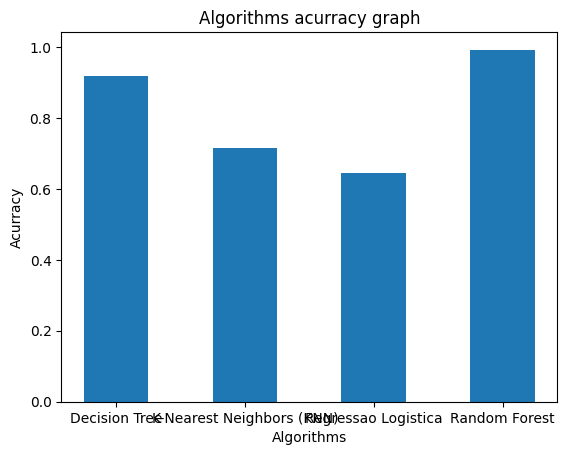

In [103]:
import matplotlib.pyplot as plt

# plt.plot(algorithm, metrics)
plt.bar(algorithm, metrics, width=0.5)
plt.title('Algorithms acurracy graph')
plt.xlabel('Algorithms')
plt.ylabel('Acurracy')

plt.show()

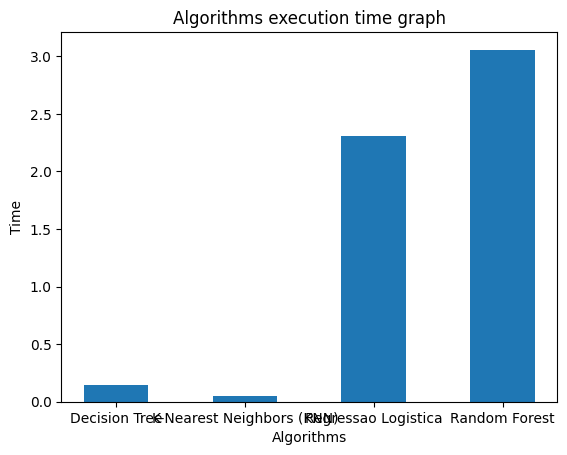

In [104]:
import matplotlib.pyplot as plt

# plt.plot(algorithm, metrics)
plt.bar(algorithm, exec_time, width=0.5)
plt.title('Algorithms execution time graph')
plt.xlabel('Algorithms')
plt.ylabel('Time')

plt.show()

## Making some insights

In [105]:
features_names = dataframe.columns
features_names

Index(['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'season'],
      dtype='object')

In [106]:
feature_importance = pd.DataFrame(tree.feature_importances_, index=features_names).sort_values(0, ascending=False)
feature_importance

,0
stem-width,0.255919
gill-attachment,0.193610
stem-height,0.160225
stem-color,0.151237
gill-color,0.125972
cap-diameter,0.044771
cap-shape,0.042947
season,0.025318


<Axes: >

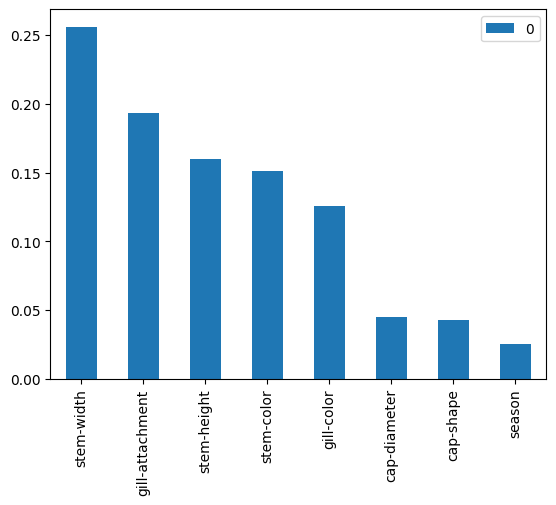

In [107]:
feature_importance.plot(kind='bar')